# USing Artificial Neural Network

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt 

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Data set\FakeNote.csv")

In [3]:
df.head(3)

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.61251,0
1,3.2718,1.7837,2.1161,0.61334,0
2,-3.9411,-12.8792,13.0597,-3.31250,1


In [4]:
df.shape

(1096, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


In [6]:
df.isnull().sum()

VWTI     0
SWTI     0
CWTI     0
EI       0
Class    0
dtype: int64

In [7]:
X=df.drop("Class",axis=1)
y=df['Class']
X

,VWTI,SWTI,CWTI,EI
0,2.263400,-4.4862,3.65580,-0.612510
1,3.271800,1.7837,2.11610,0.613340
2,-3.941100,-12.8792,13.05970,-3.312500
3,0.519500,-3.2633,3.08950,-0.984900
4,2.569800,-4.4076,5.98560,0.078002
...,...,...,...,...
1091,1.640600,3.5488,1.39640,-0.364240
1092,-0.048008,-1.6037,8.47560,0.755580
1093,2.942100,7.4101,-0.97709,-0.884060
1094,1.964700,6.9383,0.57722,0.663770


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Further split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Ensure target is in binary format (0 or 1 for binary classification)
# No need for one-hot encoding in binary classification
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [11]:
# Check shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (700, 4), y_train shape: (700,)
X_val shape: (176, 4), y_val shape: (176,)
X_test shape: (220, 4), y_test shape: (220,)


In [12]:
X_train.shape[1]

4

In [13]:
## Build the Ann Model
model= Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), #Input layer
    Dropout(0.3), #Dropout to reduce overfitting
    Dense(32,activation='relu'),
     Dropout(0.3),
     Dense(16,activation='relu'),
     Dropout(0.3),
     Dense(10,activation='relu'),
     Dropout(0.3),
     Dense(1,activation='sigmoid')   # Output layer (for binary classification)
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitors validation loss
    patience=5,          # Stops training after 5 epochs with no improvement
    restore_best_weights=True  # Restores the best model weights
)

# Check model summary
model.summary()


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,109 (12.14 KB)

 Trainable params: 3,109 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

## Train THe Model

In [15]:
history=model.fit(
    X_train,y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    callbacks=[early_stopping]   # Use early stopping callback
)

Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6129 - loss: 0.6634 - val_accuracy: 0.8466 - val_loss: 0.6296
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7414 - loss: 0.5895 - val_accuracy: 0.8864 - val_loss: 0.5189
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8200 - loss: 0.4950 - val_accuracy: 0.9091 - val_loss: 0.3720
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8743 - loss: 0.3708 - val_accuracy: 0.9261 - val_loss: 0.2506
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9014 - loss: 0.2906 - val_accuracy: 0.9545 - val_loss: 0.1554
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9371 - loss: 0.2394 - val_accuracy: 0.9545 - val_loss: 0.1120
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9500 - loss: 0.1982 - val_accuracy: 0.9830 - val_loss: 0.0766
Epoch 8/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9657 - loss: 0.1384 - val_accuracy: 0.9830 - v

## Evaluation

In [18]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0034    


[0.003356250235810876, 1.0]

In [19]:
y_pred=(model.predict(X_test)>0.5).astype(int)
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        85

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



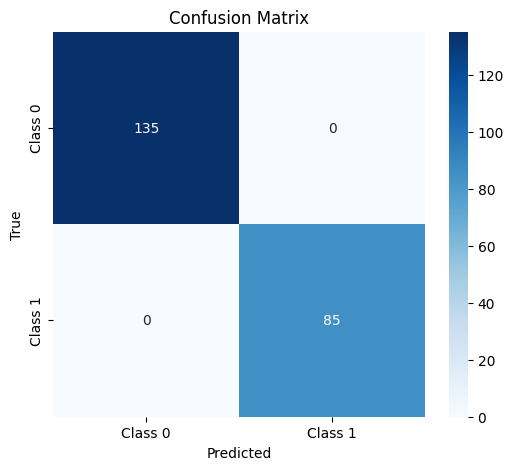

In [20]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Predicition System

In [24]:
def make_prediction(input_data):
    input_data_scaled = scaler.transform(input_data)
    predictions = model.predict(input_data_scaled)
    predicted_class = (predictions > 0.5).astype(int)

    if predicted_class[0] == 1:
        return "Real Note"
    else:
        return "Fake Note"


In [25]:
input_data=np.array([[1.5,2.3,3.4,0.7]])
result=make_prediction(input_data)
print(result)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
Fake Note


# Save

In [26]:
import pickle
model.save('models/model.h5')

with open('models/scaler.pkl','wb') as scaler_file:
    pickle.dump(scaler,scaler_file)
